# Black Friday Sales Prediction

### Import libraries 

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
#loading dataset
df=pd.read_csv('train.csv')

In [3]:
#preview the dataset
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
#dataset dimensions
df.shape

(550068, 12)

In [5]:
#dataset columns
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
#datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
#statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [8]:
# find unique values
df.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

### Descriptive Analysis

In [9]:
#checking for null values
df.isnull().sum()/df.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

#There are a lot of null values in product category 3 ,so we will consider to drop this column

In [10]:
#checking for the percentage of unique values of age
df['Age'].value_counts(normalize=True)*100

26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: Age, dtype: float64

In [11]:
#checking for the percentage of unique values of age
df['Stay_In_Current_City_Years'].value_counts(normalize=True)*100

1     35.235825
2     18.513711
3     17.322404
4+    15.402823
0     13.525237
Name: Stay_In_Current_City_Years, dtype: float64

#The features 'Age' and 'Stay_In_Current_City_Years' contain some values which have '+' in them which need to be replaced.

### Univariate Analysis

Text(0.5, 1.0, 'Purchase Amount distribution')

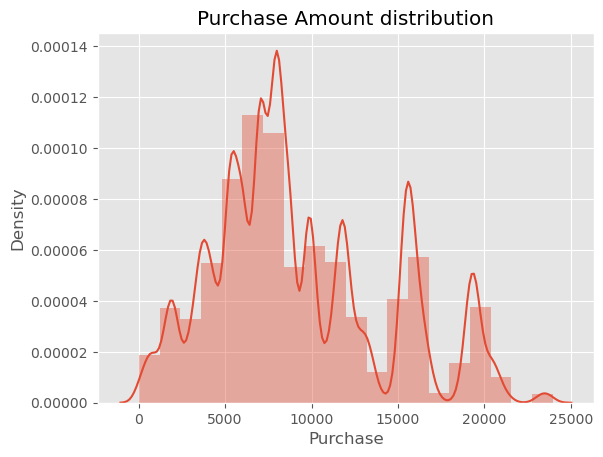

In [12]:
#distplot for purchase
plt.style.use('ggplot')
sns.distplot(df['Purchase'],bins=20)
plt.title('Purchase Amount distribution')

Text(0.5, 1.0, 'Gender distribution')

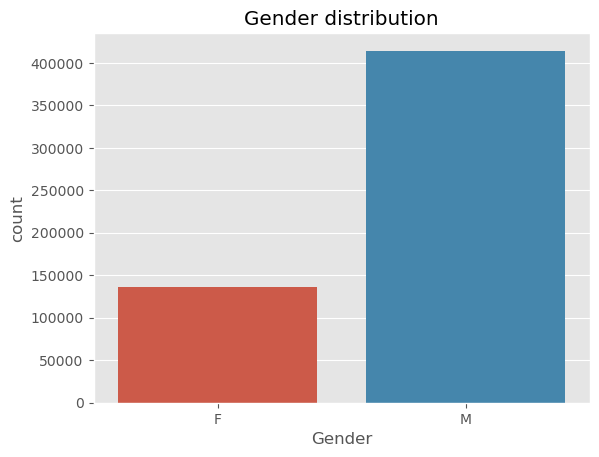

In [13]:
#distribution of gender
sns.countplot(x='Gender',data=df)
plt.title('Gender distribution')

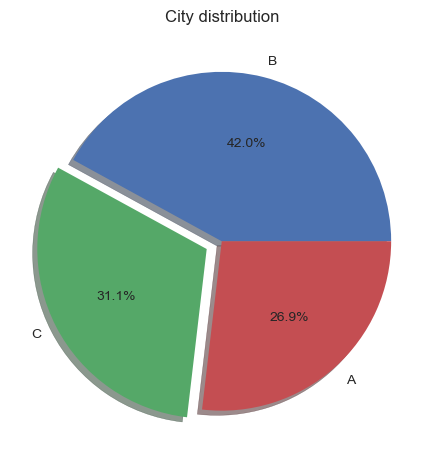

In [14]:
#pie chart of city
city = df['City_Category'].value_counts()

plt.style.use('seaborn')
plt.pie(city.values, labels = city.index,  explode = (0 , 0.10, 0), shadow = True,autopct = '%1.1f%%')
plt.title('City distribution')
plt.show()

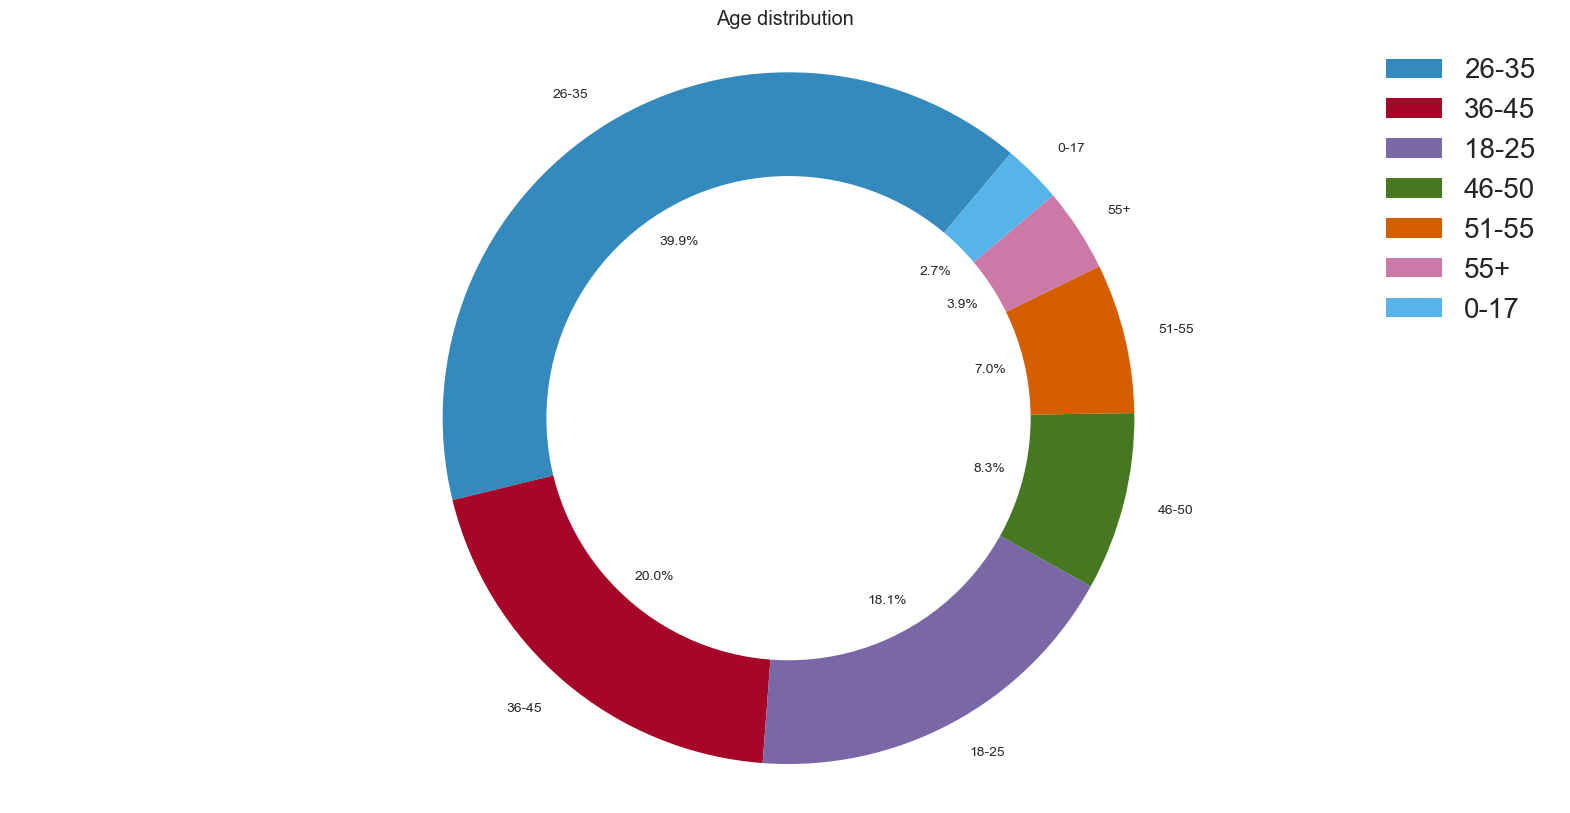

In [15]:
#donut chart of age
age = df['Age'].value_counts()

plt.style.use('bmh')
plt.figure(figsize = (20, 10))
plt.pie(age.values, labels = age.index, startangle = 50, autopct = '%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Age distribution')
plt.axis('equal')
plt.legend(prop = {'size' : 20})
plt.show()


Text(0.5, 1.0, 'Age distribution')

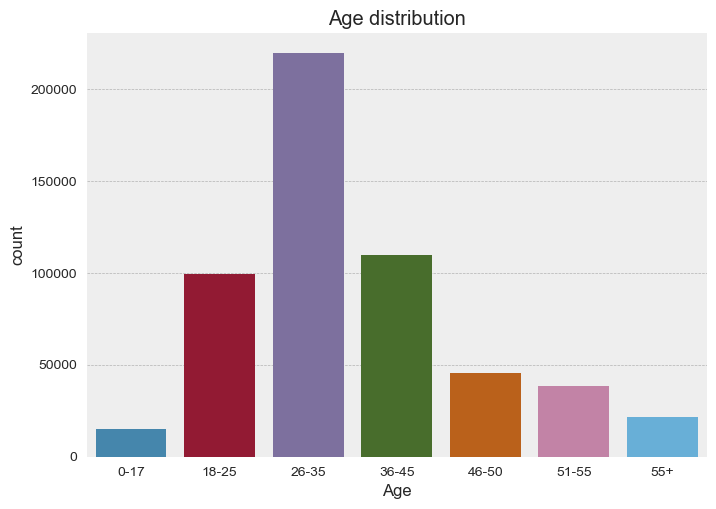

In [16]:
#countplot for age
order = ['0-17','18-25','26-35','36-45','46-50','51-55','55+']
sns.countplot(x='Age',data=df,order=order)
plt.title('Age distribution')

Text(0.5, 1.0, 'Occupation distribution')

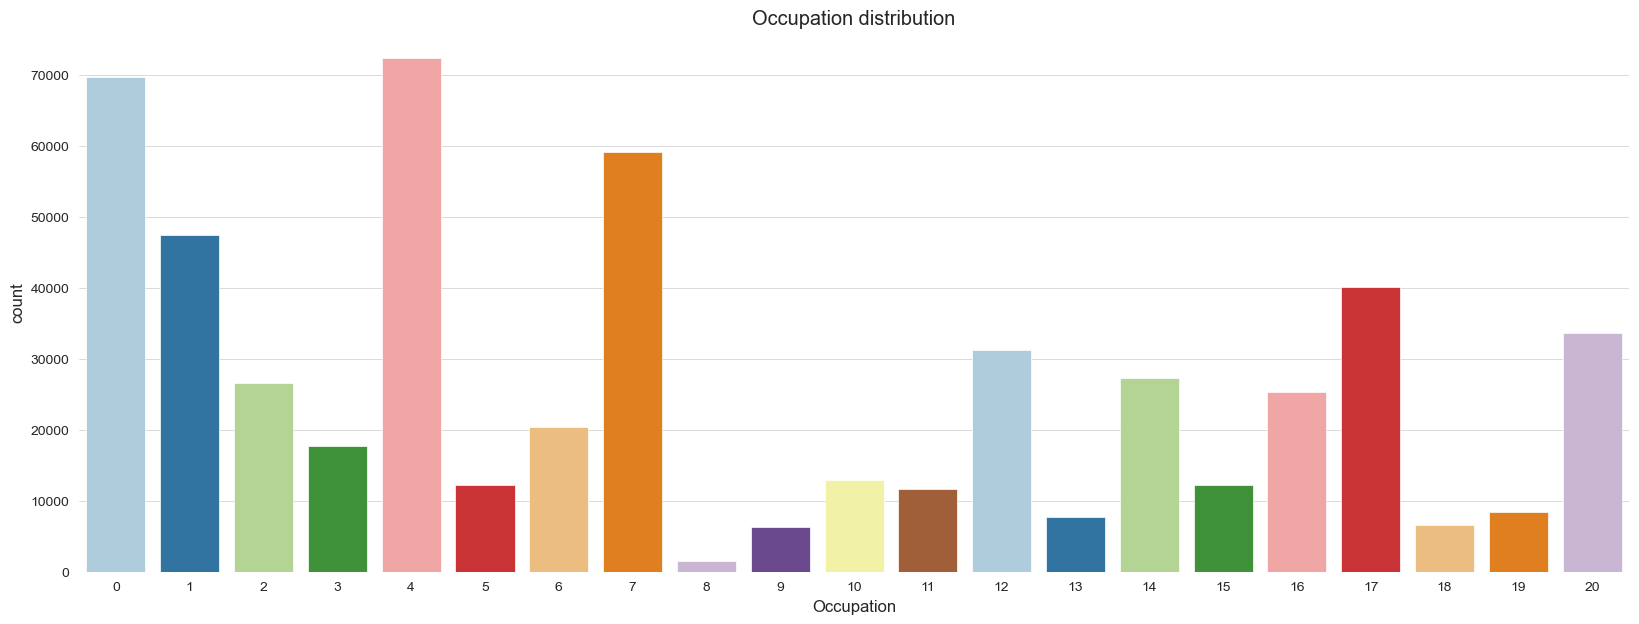

In [17]:
#distribution of occupation
plt.figure(figsize=(20,7))
sns.set_style('whitegrid')
sns.countplot(x='Occupation',data=df,palette='Paired')
plt.title('Occupation distribution')

Text(0.5, 1.0, 'Marital Status distribution')

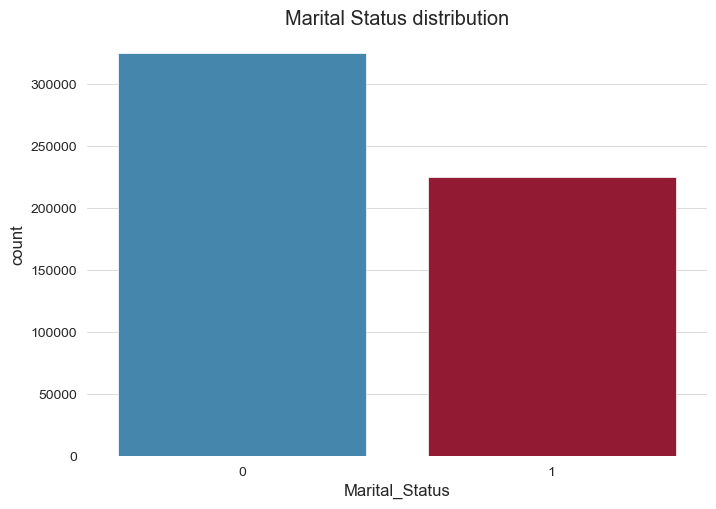

In [18]:
#distribution of marital status
sns.countplot(x='Marital_Status',data=df)
plt.title('Marital Status distribution')

Text(0.5, 1.0, 'Stay in current city distribution')

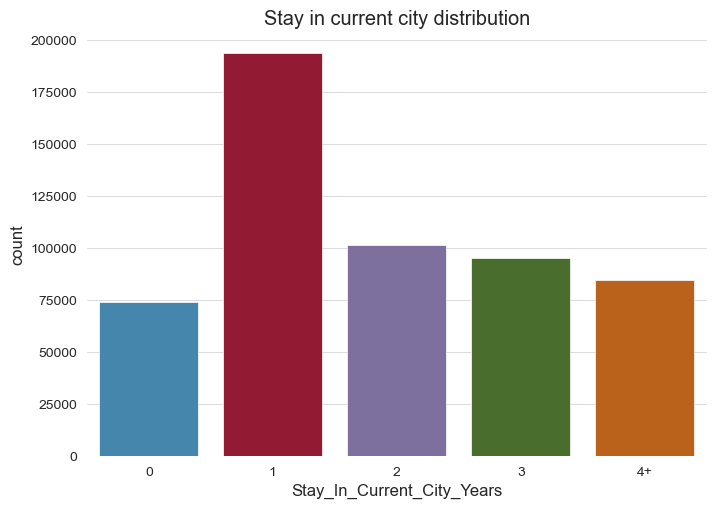

In [19]:
#distribution of stay in current city
order=['0','1','2','3','4+']
sns.countplot(x='Stay_In_Current_City_Years',data=df,order=order)
plt.title('Stay in current city distribution')

### Bivariate Analysis

Text(0.5, 1.0, 'Purchase amount across Occupation')

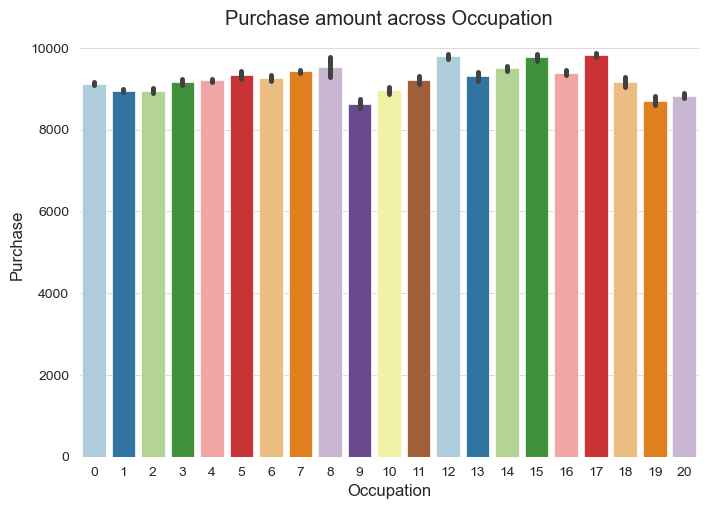

In [20]:
#barplot of occupation vs purchase
sns.barplot(df['Occupation'], df['Purchase'], palette = 'Paired')
plt.title('Purchase amount across Occupation')

Text(0.5, 1.0, 'Purchase amount across Age')

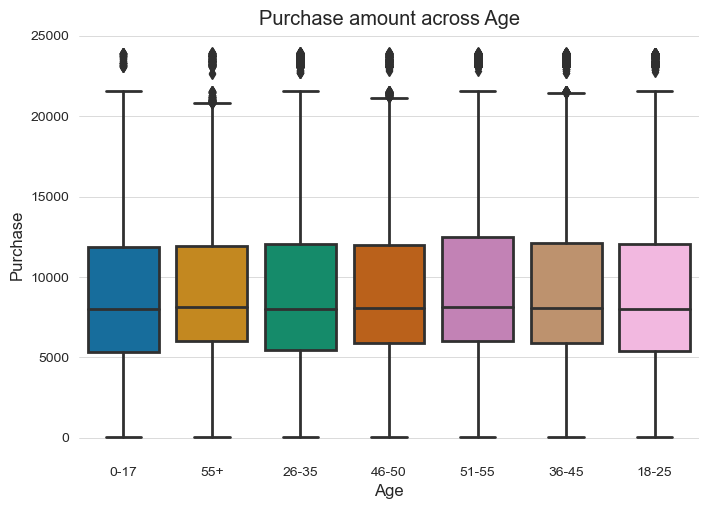

In [21]:
#boxplot of age vs purchase
sns.boxplot(x='Age',y='Purchase',data=df,palette='colorblind')
plt.title('Purchase amount across Age')

Text(0.5, 1.0, 'Purchase amount across Gender')

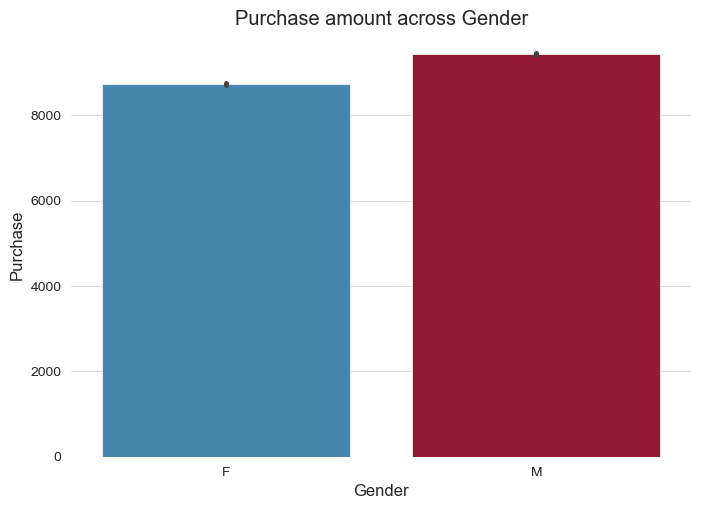

In [22]:
#barplot of gender vs purchase
sns.barplot(df['Gender'], df['Purchase'])
plt.title('Purchase amount across Gender')

Text(0.5, 1.0, 'Purchase amount across City Category')

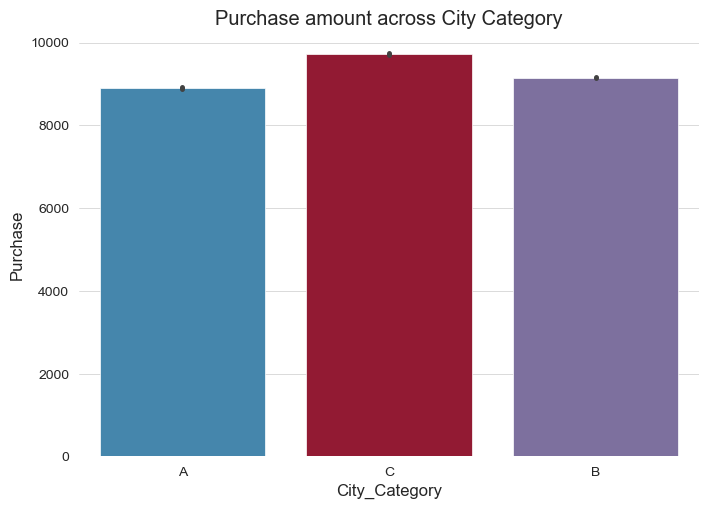

In [23]:
#barplot of city category vs purchase
sns.barplot(df['City_Category'], df['Purchase'])
plt.title('Purchase amount across City Category')

Text(0.5, 1.0, 'Purchase amount across Ptoduct Category 1')

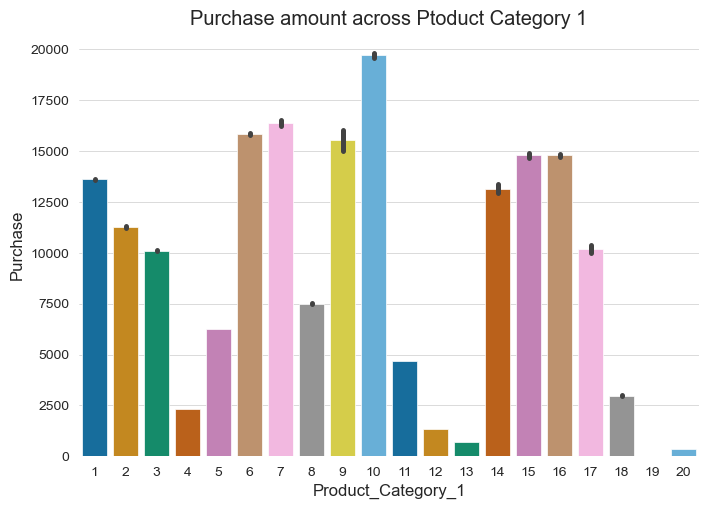

In [24]:
#barplot of product category 1 vs purchase
sns.barplot(df['Product_Category_1'], df['Purchase'], palette = 'colorblind')
plt.title('Purchase amount across Ptoduct Category 1')

Text(0.5, 1.0, 'Purchase amount across Marital Status')

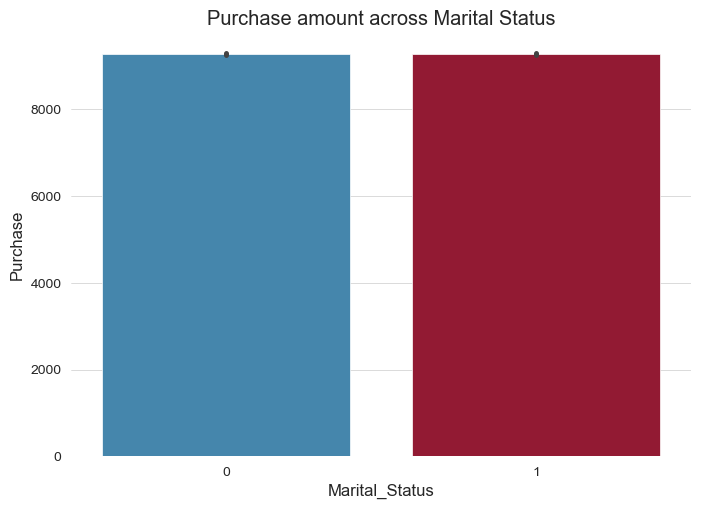

In [25]:
#barplot of marital status vs purchase
sns.barplot(df['Marital_Status'], df['Purchase'])
plt.title('Purchase amount across Marital Status')

### Multivariate Analysis

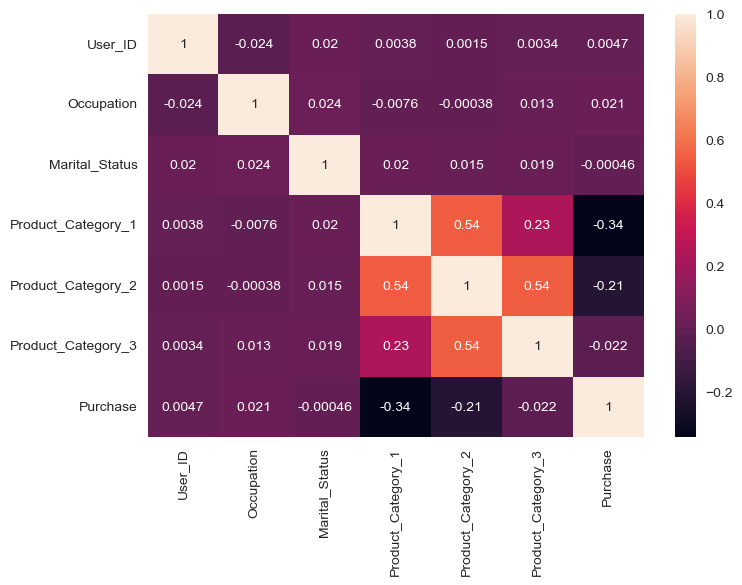

In [26]:
sns.heatmap(df.corr(), annot = True)
plt.show()

#An interesting observation can be made from the gender distribution plot that the number of females was less than the number of men who shopped during Black Friday.

#From the correlation heatmap, we can observe that the dependent feature 'Purchase' is highly correlated with 'Product_Category_1' and 'Product_Category_2'.

### Data Preprocessing

In [27]:
# Replacing '+' in Age
df['Age'] = df['Age'].apply(lambda x : str(x).replace('55+', '55'))

In [28]:
# Replacing '+' in Stay_In_Current_City_Years
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].apply(lambda x : str(x).replace('4+', '4'))

In [29]:
#dropping irrelevant columns
df.drop(columns=['Product_Category_3','User_ID','Product_ID'], axis = 1, inplace = True)

In [30]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55,16,C,4,0,8,NaN,7969


### Feature Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
#encoding gender,age and city category
var1=['Gender','Age','City_Category']
for var in var1:
    label=LabelEncoder()
    df[var] = label.fit_transform(df[var])

In [33]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,0,0,10,0,2,0,3,NaN,8370
1,0,0,10,0,2,0,1,6.0,15200
2,0,0,10,0,2,0,12,NaN,1422
3,0,0,10,0,2,0,12,14.0,1057
4,1,6,16,2,4,0,8,NaN,7969


In [34]:
#filling null values in Product_Category_2
df['Product_Category_2'].fillna(df['Product_Category_2'].median(), inplace = True)

In [35]:
#changing data type of Stay_In_Current_City_Years
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('int')

In [36]:
#separating features and target column
X = df.drop("Purchase", axis = 1)
Y = df["Purchase"]

### Feature Selection

In [37]:
from sklearn.ensemble import ExtraTreesRegressor
selector = ExtraTreesRegressor()

In [38]:
selector.fit(X, Y)

ExtraTreesRegressor()

<AxesSubplot:title={'center':'Feature Importance'}>

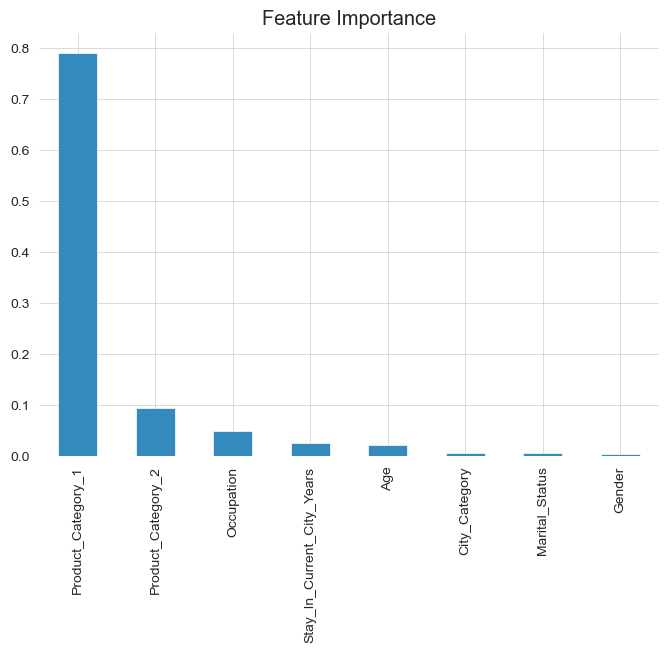

In [39]:
feature_imp = pd.Series(selector.feature_importances_, X.columns).sort_values(ascending=False)
feature_imp.plot(kind='bar', title='Feature Importance')

In [40]:
#dropping the less important features
X.drop(['Gender', 'City_Category', 'Marital_Status'], axis = 1, inplace = True)

### Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [42]:
var1=['Stay_In_Current_City_Years','Product_Category_1','Product_Category_2']
for var in var1:
        X[var] = scaler.fit_transform(X[var].values.reshape(-1, 1))

In [43]:
X.head()

,Age,Occupation,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2
0,0,10,0.109801,-0.610809,-0.136401
1,0,10,0.109801,-1.118912,-0.846289
2,0,10,0.109801,1.675656,-0.136401
3,0,10,0.109801,1.675656,1.046745
4,6,16,1.660861,0.659449,-0.136401


### Train-Test split

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

### Modelling

In [45]:
#fitting linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
Y_pred1=lr.predict(X_test)

In [46]:
#fitting knn regressor
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train,Y_train)
Y_pred2=knn.predict(X_test)

In [47]:
#fitting Decision Tree regressor
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)
Y_pred3=dt.predict(X_test)

In [48]:
#fitting random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)
Y_pred4=rf.predict(X_test)

In [ ]:
#fitting xgboost regressor
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,Y_train)
Y_pred5=xgb.predict(X_test)

### Comparing MSE and R square of all model

In [53]:
#importing various metrics of model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [54]:
print("Linear Regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred1)))
print("R2 score:", r2_score(Y_test, Y_pred1))

Linear Regression: 
RMSE: 4699.4738725770985
R2 score: 0.12103412745405795


In [55]:
print("K Nearest Neighbour: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred2)))
print("R2 score:", r2_score(Y_test, Y_pred2))

K Nearest Neighbour: 
RMSE: 3367.4702512903086
R2 score: 0.5486836471686989


In [56]:
print("Decision Tree: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred3)))
print("R2 score:", r2_score(Y_test, Y_pred3))

Decision Tree: 
RMSE: 3064.892683149923
R2 score: 0.6261442376112433


In [57]:
print("Random Forest: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred4)))
print("R2 score:", r2_score(Y_test, Y_pred4))

Random Forest: 
RMSE: 3031.873176073757
R2 score: 0.6341562873486745


In [58]:
print("XG Boost: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred5)))
print("R2 score:", r2_score(Y_test, Y_pred5))

XG Boost: 
RMSE: 2981.4912381187014
R2 score: 0.646214027661014


#Among all the models xgboost is giving us the best result with minimum RMSE and maximum R square,so we will do hyperparameter tuning to see if we can further improve the model 

### Hyper Parameter tuning

In [59]:
from sklearn.model_selection import RandomizedSearchCV

In [60]:
max_depth = [int(x) for x in np.linspace(start = 5, stop = 20, num = 15)]
learning_rate = ['0.01', '0.05', '0.1', '0.25', '0.5', '0.75', '1.0']
min_child_weight = [int(x) for x in np.linspace(start = 45, stop = 70, num = 15)]

In [61]:
params = {
 "learning_rate"    : learning_rate,
 "max_depth"        : max_depth,
 "min_child_weight" : min_child_weight,
 "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
 "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]
}

In [62]:
xgb_tune = XGBRegressor(verbosity = 0, random_state = 42)
xgb_cv = RandomizedSearchCV(xgb_tune, param_distributions = params, cv = 5, random_state = 42)
xgb_cv.fit(X_train, Y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=100, n_jobs=None,
                                  

In [63]:
xgb_cv.best_score_

0.651279037438864

In [64]:
xgb_cv.best_params_

{'min_child_weight': 66,
 'max_depth': 11,
 'learning_rate': '1.0',
 'gamma': 0.3,
 'colsample_bytree': 0.7}

### Rebuilding Model

In [65]:
xgb_best = XGBRegressor(colsample_bytree = 0.7, gamma = 0.3, learning_rate = 1.0, max_depth = 11, min_child_weight = 66) 

In [66]:
xgb_best.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=66, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [67]:
Y_pred_xgb_best = xgb_best.predict(X_test)

In [68]:
print("XGB regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_xgb_best)))
print("R2 score:", r2_score(Y_test, Y_pred_xgb_best))

XGB regression: 
RMSE: 2984.7650848224753
R2 score: 0.6454366469115508


#Here we conclude our project with xgboost being the best model for the given data with R2 score 0.645